# BCI Project: Classifying hvEEGNet encoded data with Logistic Regression and SVM

## By BrainRot: Lotte Michels & Selma Ancel

This notebook was used to train Logistic Regression and SVM models on the OpenMIIR data encoded by the hvEEGNet encoder. Please refer to our project submission for a textual description of the training steps. The notebook and comments in the code will also provide an outline of the steps that are performed. Models from the sklearn package are used. For the SVM, the setup by Stober (2017) is followed.

### References:
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.
- Following Stober's (2017) setup: 
- Stober, S. (2017). Toward Studying Music Cognition with Information Retrieval Techniques: Lessons Learned from the OpenMIIR Initiative. Frontiers in Psychology, 8. https://doi.org/10.3389/fpsyg.2017.01255. Related code is published here: https://github.com/sstober/openmiir.

## Condition 1 (Perception)


### Logistic Regression

In [41]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c1_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c1_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [42]:
# Find optimal Logistic Regression model

from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Run Grid Search
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)

# Print results
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.07409783480352847 achieved by the solver: lbfgs and a regularization parameter C of: 0.001


LogRes Accuracy on condition 1: 0.12037037037037036


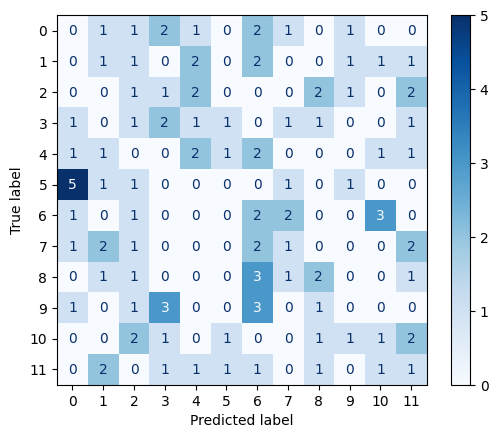

In [43]:
# Create Logistic Regression model with best hyperparameters 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train logistic regression
clf = LogisticRegression(multi_class='multinomial', solver=best_solver, C=best_c, max_iter=100000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test) # alternatively, run: gs.predict(X_test) (the gs objects also holds the best performing model)
print("LogRes Accuracy on condition 1:", accuracy_score(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Support Vector Machine (SVM) 

Following Stober (2017):
* The SVC function from 'sklearn.svm' is used
* The kernel parameter is set to 'linear'
* The following values for the regularization hyperparameter (C) are tested: [0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]


In [44]:
# Find optimal SVM model

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)

# Print results
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

SVM on condition 1: best grid search/cross-validation accuracy score was: 0.0879978615343491 achieved by a regularization parameter C of: 0.001


SVM Accuracy on condition 1: 0.12037037037037036


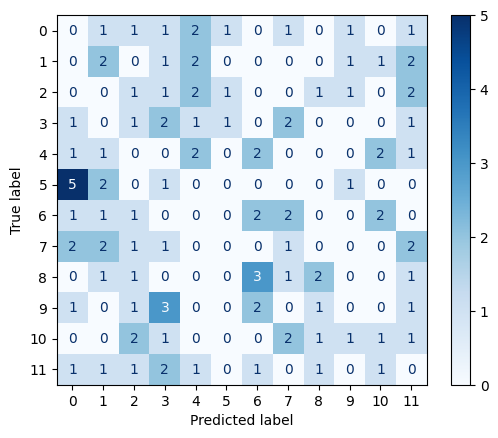

In [45]:
# Create SVM model with best hyperparameters 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train logistic regression
clf = SVC(kernel='linear', C=best_c)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("SVM Accuracy on condition 1:", accuracy_score(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

## Condition 2 (Imagination)

### Logistic Regression

In [46]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c2_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c2_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [47]:
# Find optimal Logistic Regression model

from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)

# Print results
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.08331996792301524 achieved by the solver: lbfgs and a regularization parameter C of: 0.8


LogRes Accuracy on condition 2: 0.10185185185185185


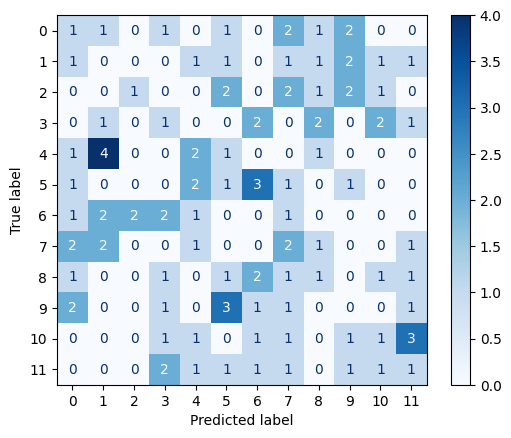

In [48]:
# Create Logistic Regression model with best hyperparameters 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train logistic regression
clf = LogisticRegression(multi_class='multinomial', solver=best_solver, C=best_c, max_iter=100000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("LogRes Accuracy on condition 2:", accuracy_score(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Support Vector Machine (SVM) 

Following Stober (2017): 
* The SVC function from 'sklearn.svm' is used
* The kernel parameter is set to 'linear'
* The following values for the regularization hyperparameter (C) are tested: [0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]

In [49]:
# Find optimal SVM model

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Run Grid Search
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)

# Print results
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)

# best score = mean cross-validated score of the best_estimator

SVM on condition 1: best grid search/cross-validation accuracy score was: 0.09021651964715317 achieved by a regularization parameter C of: 0.01


SVM Accuracy on condition 1: 0.09259259259259259


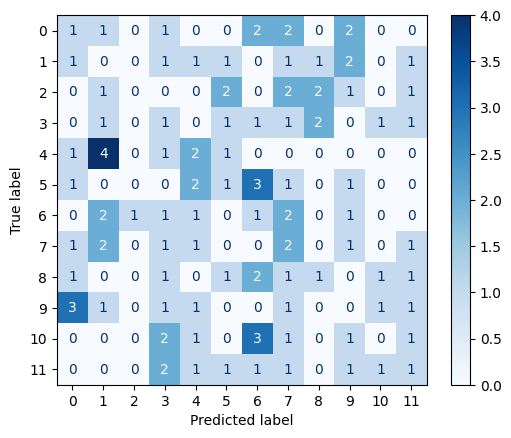

In [50]:
# Create SVM model with best hyperparameters 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Train logistic regression
clf = SVC(kernel='linear', C=best_c)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("SVM Accuracy on condition 1:", accuracy_score(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Classifying on Song Group and Song Meter instead of Stimulus

In [55]:
group_dict = {0:1,1:1, 2:1, 3:1, 
             4:2, 5:2, 6:2, 7:2,
             8:3, 9:3, 10:3, 11:3} # nr = group. There are three groups/classes

meter_dict = {0:1, 1:1, 4:1, 5:1, 8:1, 9:1,
             2:2, 3:2, 6:2, 7:2, 10:2, 11:2} # 1 = 3/4 meter, 2 = 4/4 meter. There are two meters/classes

## Condition 1 (Perception)

In [52]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c1_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c1_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [53]:
# Group classification

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Map y and train/test split
y_group = np.array([group_dict[n] for n in y])
#print(y_group)
X_train, X_test, y_train, y_test = train_test_split(X, y_group, test_size=0.2, random_state=42, stratify=y_group)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Group-LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Group-LogRes test accuracy on condition 1:", accuracy_score(y_test, y_pred))


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X_train, y_train)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Group-SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Group-SVM Test accuracy on condition 1:", accuracy_score(y_test, y_pred))


Group-LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.3080459770114943 achieved by the solver: lbfgs and a regularization parameter C of: 0.05
Group-LogRes test accuracy on condition 1: 0.37962962962962965
Group-SVM on condition 1: best grid search/cross-validation accuracy score was: 0.30114942528735633 achieved by a regularization parameter C of: 0.005
Group-SVM Test accuracy on condition 1: 0.4351851851851852


In [56]:
# Meter classification

# Map y and train/test split
y_meter = np.array([meter_dict[n] for n in y])
#print(y_meter)
X_train, X_test, y_train, y_test = train_test_split(X, y_meter, test_size=0.2, random_state=42, stratify=y_meter)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Meter-LogRes on condition 1: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Meter-LogRes test accuracy on condition 1:", accuracy_score(y_test, y_pred))


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X_train, y_train)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Meter-SVM on condition 1: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Meter-SVM Test accuracy on condition 1:", accuracy_score(y_test, y_pred))


Meter-LogRes on condition 1: best grid search/cross-validation accuracy score was: 0.5159315690991713 achieved by the solver: lbfgs and a regularization parameter C of: 0.001
Meter-LogRes test accuracy on condition 1: 0.4722222222222222
Meter-SVM on condition 1: best grid search/cross-validation accuracy score was: 0.5415129644480086 achieved by a regularization parameter C of: 0.0005
Meter-SVM Test accuracy on condition 1: 0.4444444444444444


## Condition 2 (Imagination)

In [57]:
# Load data

import numpy as np

X = np.load('/kaggle/input/openmiir/c2_latent_features.npy')
y = np.load('/kaggle/input/openmiir/c2_labels.npy')
print(X.shape, y.shape)

X = X.reshape(540, -1)
print(X.shape, y.shape)

(540, 16, 1, 45) (540,)
(540, 720) (540,)


In [58]:
# Group classification

from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Map y and train/test split
y_group = np.array([group_dict[n] for n in y])
#print(y_group)
X_train, X_test, y_train, y_test = train_test_split(X, y_group, test_size=0.2, random_state=42, stratify=y_group)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Group-LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Group-LogRes test accuracy on condition 2:", accuracy_score(y_test, y_pred))


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X_train, y_train)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Group-SVM on condition 2: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Group-SVM Test accuracy on condition 2:", accuracy_score(y_test, y_pred))


Group-LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.3633520449077786 achieved by the solver: lbfgs and a regularization parameter C of: 0.5
Group-LogRes test accuracy on condition 2: 0.3055555555555556
Group-SVM on condition 2: best grid search/cross-validation accuracy score was: 0.33319967923015237 achieved by a regularization parameter C of: 0.005
Group-SVM Test accuracy on condition 2: 0.3425925925925926


In [59]:
# Meter classification

# Map y and train/test split
y_meter = np.array([meter_dict[n] for n in y])
#print(y_meter)
X_train, X_test, y_train, y_test = train_test_split(X, y_meter, test_size=0.2, random_state=42, stratify=y_meter)


# Logistic Regression
classifier = LogisticRegression(multi_class='multinomial', penalty='l2', max_iter=100000)
param_grid = {'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'C':[0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') # for each fold, GridSearch automaticcaly stratifies y
gs.fit(X_train, y_train)
best_solver, best_c, best_score = gs.best_params_['solver'], gs.best_params_['C'], gs.best_score_
print("Meter-LogRes on condition 2: best grid search/cross-validation accuracy score was:",best_score, "achieved by the solver:", best_solver, 'and a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Meter-LogRes test accuracy on condition 2:", accuracy_score(y_test, y_pred))


# SVM
classifier = SVC(kernel='linear')
param_grid = {'C':[0.01, 0.05, 0.1, 0.005, 0.001, 0.0005, 0.0001, 0.5, 1, 2]}
gs = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy') 
gs.fit(X_train, y_train)
best_c, best_score = gs.best_params_['C'], gs.best_score_
print("Meter-SVM on condition 2: best grid search/cross-validation accuracy score was:",best_score, 'achieved by a regularization parameter C of:', best_c)
y_pred = gs.predict(X_test)
print("Meter-SVM Test accuracy on condition 2:", accuracy_score(y_test, y_pred))


Meter-LogRes on condition 2: best grid search/cross-validation accuracy score was: 0.5023790430366212 achieved by the solver: lbfgs and a regularization parameter C of: 0.001
Meter-LogRes test accuracy on condition 2: 0.5462962962962963
Meter-SVM on condition 2: best grid search/cross-validation accuracy score was: 0.5163592622293505 achieved by a regularization parameter C of: 0.001
Meter-SVM Test accuracy on condition 2: 0.5462962962962963
